# 합성곱 신경망의 필요성
  - 글자나 이미지를 일렬로 바꾼 입력값의 경우 사람 입장에서 보기엔 어떤 글자인지 전혀 알아볼 수 없음.
  - 그러나 입력값을 일렬로 나열하면, 기계 입장에서도 어렵다. 왜냐하면, 공간적 구조(spatial structure) 정보가 유실되었기 때문이다.
    - 입력값을 1차원 배열처럼 일렬로 나열하면, 2D 공간에서 점들간의 거리로 나타낼 수 있는 정보가 사라진다.
  - 공간적 구조 정보를 보존하고 이용할 수 있는 신경망 구조 및 정보 처리 방식이 필요함.

# 시각 피질 구조
  - 우리 눈의 망막 세포는 빛을 감지하며, 각 망막 세포는 수용장(receptive field, 빛을 감지하는 범위)에 해당하는 범위의 시각 정보를 입력받아 처리함.
  - 망막에 맺힌 상이 시각 정보를 분석하는 뇌 영역인 시각 피질(visual cortex)로 정보를 전달하는 과정은 Retina -> Lateral geniculate nucleus -> Primary visual cortex (V1)이다.
  - 망막 세포에서 근처에 있는 정보끼리 취합해 그 다음으로 정보를 전달하는 것을 확인할 수 있음.
  - 자연계에서 이미지의 공간 정보를 분석하는 방식은 각 픽셀마다 근처의 정보를 취합하는 것을 반복하여 최종적으로 전체를 분석한다는 것을 알 수 있음.
  - 합성곱 신경망은 실제 시각 신경계의 구조에 착안하여 개발된 신경망 구조이며 이미지 처리가 핵심 응용 분야이나 그 외의 다양한 분야에서도 널리 활용되고 있음.

# 합성곱 연산
  - 합성곱 연산 - 채널
    - 흑백 이미지의 경우, 3차원 텐서로 표현함.
    - 컬러 이미지도 3차원 텐서인데 마지막 차원의 경우 3의 값을 가진다.
      - 빛의 삼원색인 Red, Green, Blue에 해당하는 흑백 이미지 3장을 갖고 있다고 보면 된다.
      - 이미지에서 색상에 해당하는 차원 혹은 가로, 세로 이외의 3번째 차원을 채널(channel)이라고 함.
      - 이미지 = Red Channel + Green Channel + Blue Channel
    
  - 합성곱 연산
    - 합성곱 층(convolution layer)은 신경망 층 구성 방식의 한 종류로써 합성곱(convolution) 연산을 통해 다음 층에 내보낼 출력값을 계산함.
    - 합성곱 연산에는 입력값 및 커널(kernel, filter)가 필요함.
    - 합성곱 연산 순서
      - 1. 입력값에 커널을 붙인다.
      - 2. 커널을 stride 씩 움직인다.
      - 3. 입력값과 커널이 겹친 공간의 값들을 모두 각 위치끼리 곱해서 더함.
    - 일반적으로 커널은 입력값보다 작은 크기를 갖고 있음.
    - 모든 연산을 마치고 나면 나오는 결과값들을 특징 맵(feature map)이라고 함.
    - stride: 커널이 움직이는 간격
    - 기본적으로 1보다 큰 크기의 커널로 합성곱을 진행한 이후에는 feature map의 크기가 입력값다 큰 크기의 커널로 합성곱을 진행한 이후에는 feature map의 크기가 입력값 보다 작아지게 됨.
    - 딥러닝에서는 layer를 충분히 깊게 쌓아야 저레벨 특징점으로부터 고레벨 특징점을 학습할 수 있으므로 이렇게 featrue map 크기가 줄어드는 것은 문제가 될 수 있음.
      - 만약 합성곱 이후에도 feature map 크기가 동일하다면, 원하는 만큼 layer를 쌓을 수 있음.
    - 합성곱을 진행한 이후의 feature map 크기가 입력값과 동일하게 만들고 싶다면, 입력값 주변에 다른 값들을 둘러주어야 함. -> padding
      - 패딩 시에 입력하는 값은 주로 0을 활용하지만, 상황에 따라 1 또는 직접 지정한 값을 활용할 수 있음.
    - 합성곱 연산을 수행하는 합성곱 층(convolution layer)을 위주로 이루어진 신경망 구조를 합성곱 신경망(Convolutional Neural Network, CNN)이라고 함.
    - 합성곱 층의 가중치 및 편향은 MLP에서와는 다른 구조를 보임.
    - 합성곱 신경망에서도 맨 마지막에 분류를 담당하는 레이어들은 MLP 형태를 사용함.
    - 합성곱 층에서도 편향을 추가할 수 있으며, 이 때 편향은 각 커널당 하나의 값을 있음.
      - 해당 커널로부터 생성된 feature map의 모든 요소에 같은 값이 더해짐.
      - 입력 이미지 * 커널 + 편향 = 특징 맵
    - Feature map 크기 계산
      - 변수들의 정의
        - I_h = 입력 텐서의 높이
        - I_w = 입력 텐서의 너비
        - K_h = 커널의 높이
        - K_w = 커널의 너비
        - S = stride
        - P = padding
      - feature map의 높이, 너비 구하기
        - feature map의 높이(O_h) = floor((I_h - K_h + 2P / S) + 1)
        - feature map의 높이(O_w) = floor((I_w - K_w + 2P / S) + 1)
    - 3차원 텐서의 합성곱 연산
      - 3개의 채널을 가진 컬러 이미지로부터 하나의 특징 맵을 만들기 위해 총 3개의 채널에 대해 3개의 커널 필요함.
      - 1. 컬러 이미지
      - 2. Red Image, Green Image, Blue Image
      - 3. Red Image * Red에 대한 Kernel, Green Image * Green에 대한 Kernel, Blue Image * Blue에 대한 Kernel
      - 4. Red Image * Red에 대한 Kernel + Green Image * Green에 대한 Kernel + Blue Image * Blue에 대한 Kernel = feature map
      - 이를 잏반화하면, 입력 텐서의 채널 수 만큼의 커널이 있어야 특징 맵 하나를 생성할 수 있음.
      - 다수의 커널을 사용하면, 원하는 개수의 채널을 갖는 특징 맵을 생성할 수 있음.
      - 어떤 합성곱 층에서 필요한 커널의 개수 = 입력 텐서의 채널 수 * 특성 맵 개수(특성 맵의 채널)
    - 합성곱 층의 가중치 매개변수 개수 계산
      - 합성곱 층의 가중치 매개변수 개수 = 커널 하나에 들어가는 매개변수 개수 * 총 커널 개수

# 풀링
  - Pooling
    - 주어진 입력값에서 정보를 추출한 후, 크기가 줄어든 특징 맵을 생성하는 연산의 일종
      - max pooling, avg pooling이 주로 사용됨.
    - 저레벨 특징점들을 바탕으로 더 고레벨의 특징점을 학습하기 위해 필요한 과정
      - 풀링을 통해 합성곱 신경망은 더 넓은 범위의 이미지를 분석할 수 있게 됨.

# 합성곱 신경망
  - 합성곱 신경망
    - 합성곱 층 및 풀링 층을 반복하여 쌓아서 만들어지며, 맨 마지막에는 MLP를 이용해 분류 혹은 회귀 등의 작업을 수행함.
    - 합성곱과 풀링을 반복하는 신경망에서는 표현 학습을 수행한다고 볼 수 있다.
    - 학습된 표현은 MLP에 입력하기 적합한 1차원 형태로 바뀌며, 이와 같은 reshape 과정을 flatten이라고 함.
    - Feature Map이 flatten된 뒤의 연산을 담당하는 MLP에서는 본격적인 분류 및 회귀를 수행함.
    - 합성곱 신경망은 전통적인 MLP와 더불어 표현 학습을 수행하기 위한 합성곱 및 풀링 층들을 결합한 것임.
   

# 합성곱 신경망 상세 구조
  - 합성곱 신경망 상세 구조
    - 합성곱 이후에는 feature map에 activation function을 적용한다.
    - Max Pooling을 수행하면, feature map의 높이 및 너비가 줄어들게 되며, 보통 conv, activation, pooling을 엮어서 하나의 layer로 취급함.
    - 1. 더 큰 크기의 커널을 사용하면, 한 layer에서 더 넓은 영역을 자세히 분석할 수 있겠지만, 크기 3인 커널을 사용하는 layer를 여러 번 중첩하는 것이 더 적은 파라미터로 유사한 성능을 낼 수 있음.
    - 2. 두번째 layer에서도 유사하게 크기 3인 커널로 합성곱을 수행한 후, pooling을 수행함.
      - 다만, 채널의 개수가 증가한다.
    - 3. Pooling을 수행하면 데이터 양이 1/4로 줄어들게 되므로 정보 손실을 완화하기 위해서 Pooling 이후의 합성곱 연산 시에는 채널을 2배로 늘려주는 것이 일반적임.
    - 4. 합성곱 연산들을 통해 표현 학습을 충분하게 수행한 후에는 MLP를 이용해 분류 작업 수행.
      - MLP를 구성하는 layer들은 뉴런 사이의 모든 연결에 대해 가중치가 존재하므로 전결합층(fully-connected layer, FC layer)라고 함.

In [1]:
# 합성곱 신경망 구현
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

# for reproducibility
random.seed(7777)
torch.manual_seed(7777)
if device == 'cuda':
    torch.cuda.manual_seed_all(7777)

다음 기기로 학습합니다: cuda


In [2]:
# Model code
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.fc = nn.Sequential(nn.Linear(7 * 7 * 64, 100),
                            nn.ReLU(),
                            nn.Linear(100, 10))

  def forward(self, x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = output.view(output.size(0), -1) # FC를 하기 위해 flatten
    output = self.fc(output)
    return output

In [6]:
# Training

# hyperparameter
training_epochs = 3
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                          train = True,
                          transform = transforms.ToTensor(),
                          download = True)

mnist_test = dsets.MNIST(root = 'MNIST_data/',
                          train = False,
                          transform = transforms.ToTensor(),
                          download = True)

# dataset loader
data_loader = DataLoader(dataset = mnist_train,
                         batch_size = batch_size,
                         shuffle = True)

# CNN 객체 생성
model = CNN().to(device)
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)
  for idx, (x_train, y_train) in enumerate(data_loader):
    x_train = x_train.to(device)
    y_train = y_train.to(device)

    outputs = model(x_train)
    cost = criterion(outputs, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch
  print(f'Epoch: {epoch + 1 : 04d} cost = {avg_cost : 9f}')
print('Learning finished')

Epoch:  001 cost =  0.165697
Epoch:  002 cost =  0.060950
Epoch:  003 cost =  0.049226
Learning finished


In [7]:
# Testing
with torch.no_grad():
  x_test = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
  y_test = mnist_test.targets.to(device)

  prediction = model(x_test)
  correct_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correct_prediction.float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.9550999999046326


Label:  7
Prediction:  3


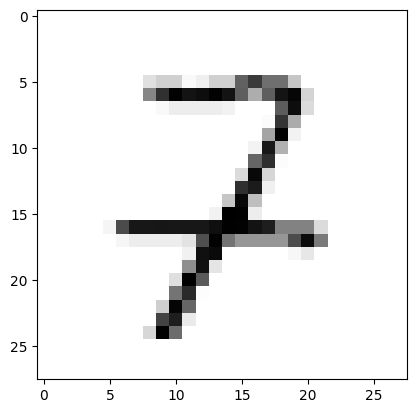

In [9]:
# MNIST 테스트 데이터에서 틀린 샘플 중 무작위로 하나를 뽑아서 예측을 해본다
with torch.no_grad():
    wrong_indices = (correct_prediction == 0).nonzero(as_tuple=True)[0]
    r = random.randint(0, len(wrong_indices) - 1)
    r = wrong_indices[r].cpu().item()
    x_single_data = mnist_test.data[r:r + 1].view(-1, 1, 28, 28).float().cuda()
    y_single_data = mnist_test.targets[r:r + 1].cuda()

    print('Label: ', y_single_data.item())
    single_prediction = model(x_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()